#Improving recall of minority class using SMOTE

In [1]:
#import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
df = pd.read_csv("diabetes.csv")

In [3]:
#1st 5 rows
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
#dimention of the data
df.shape

(768, 9)

In [5]:
#Basic details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#basic descriptive statistics
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

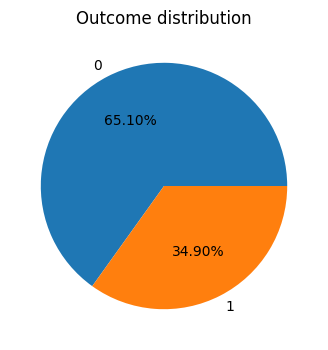

In [7]:
#Class imbalance using Pie chart
outcome_count = df['Outcome'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(outcome_count, labels=outcome_count.index, autopct='%0.2f%%')
plt.title('Outcome distribution')
plt.show()

In [8]:
#to check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#to check duplicate rows
df.duplicated().sum()

np.int64(0)

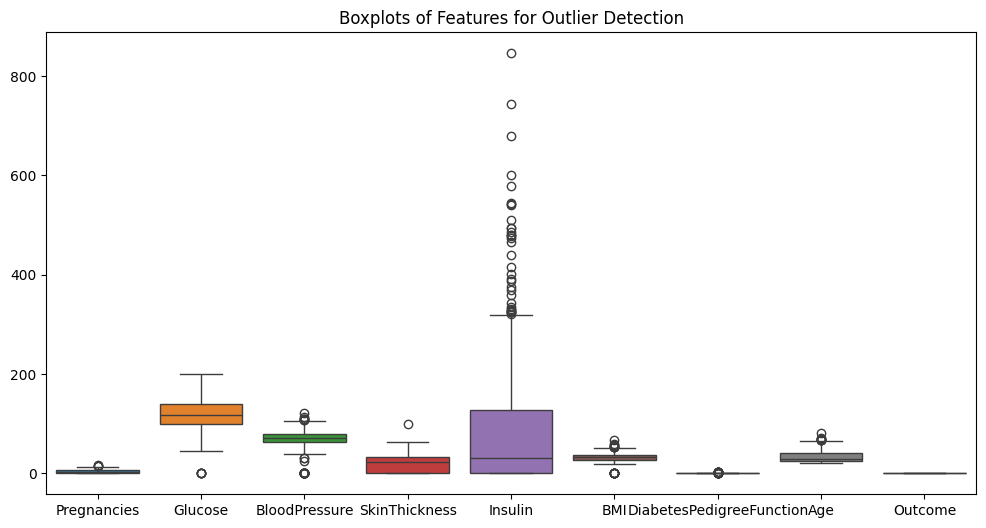

In [10]:
#Boxplots to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplots of Features for Outlier Detection')
plt.show()

In [11]:
#create a for loop and apply on all columns
for column in df.columns.drop(['Outcome']):
  print('Column name:',column )
  # calculate IQR for column Height
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  threshold = 1.5
  lower_limit = Q1 - threshold*IQR
  upper_limit = Q3 + threshold*IQR

  #outliers
  outliers=df[(df[column] < lower_limit) | (df[column] > upper_limit)]
  print("Outliers: \n",outliers)
  print('Number of Outliers: ', len(outliers))

  #capping
  df.loc[(df[column]<lower_limit),column]=lower_limit
  df.loc[(df[column]>upper_limit),column]=upper_limit
  print("-------------------------------")

Column name: Pregnancies
Outliers: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
Number of Outliers:  4
-------------------------------
Column name: Glucose
Outliers: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75           1.0        0             48             20        0  24.7   
182          1.0        0             74             20       23  27.7   
342          1.0        0             68            

<ipython-input-11-b3072ebf55dd>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column]<lower_limit),column]=lower_limit
<ipython-input-11-b3072ebf55dd>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column]<lower_limit),column]=lower_limit
<ipython-input-11-b3072ebf55dd>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-190.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column]<lower_limit),column]=lower_limit
<ipython-input-11-b3072ebf55dd>:18: FutureWarning: Setting

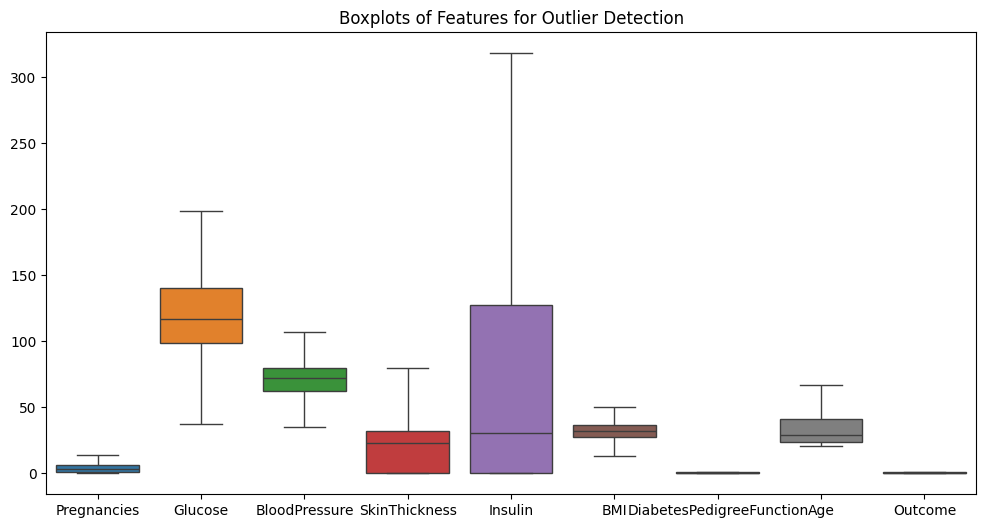

In [12]:
#Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplots of Features for Outlier Detection')
plt.show()

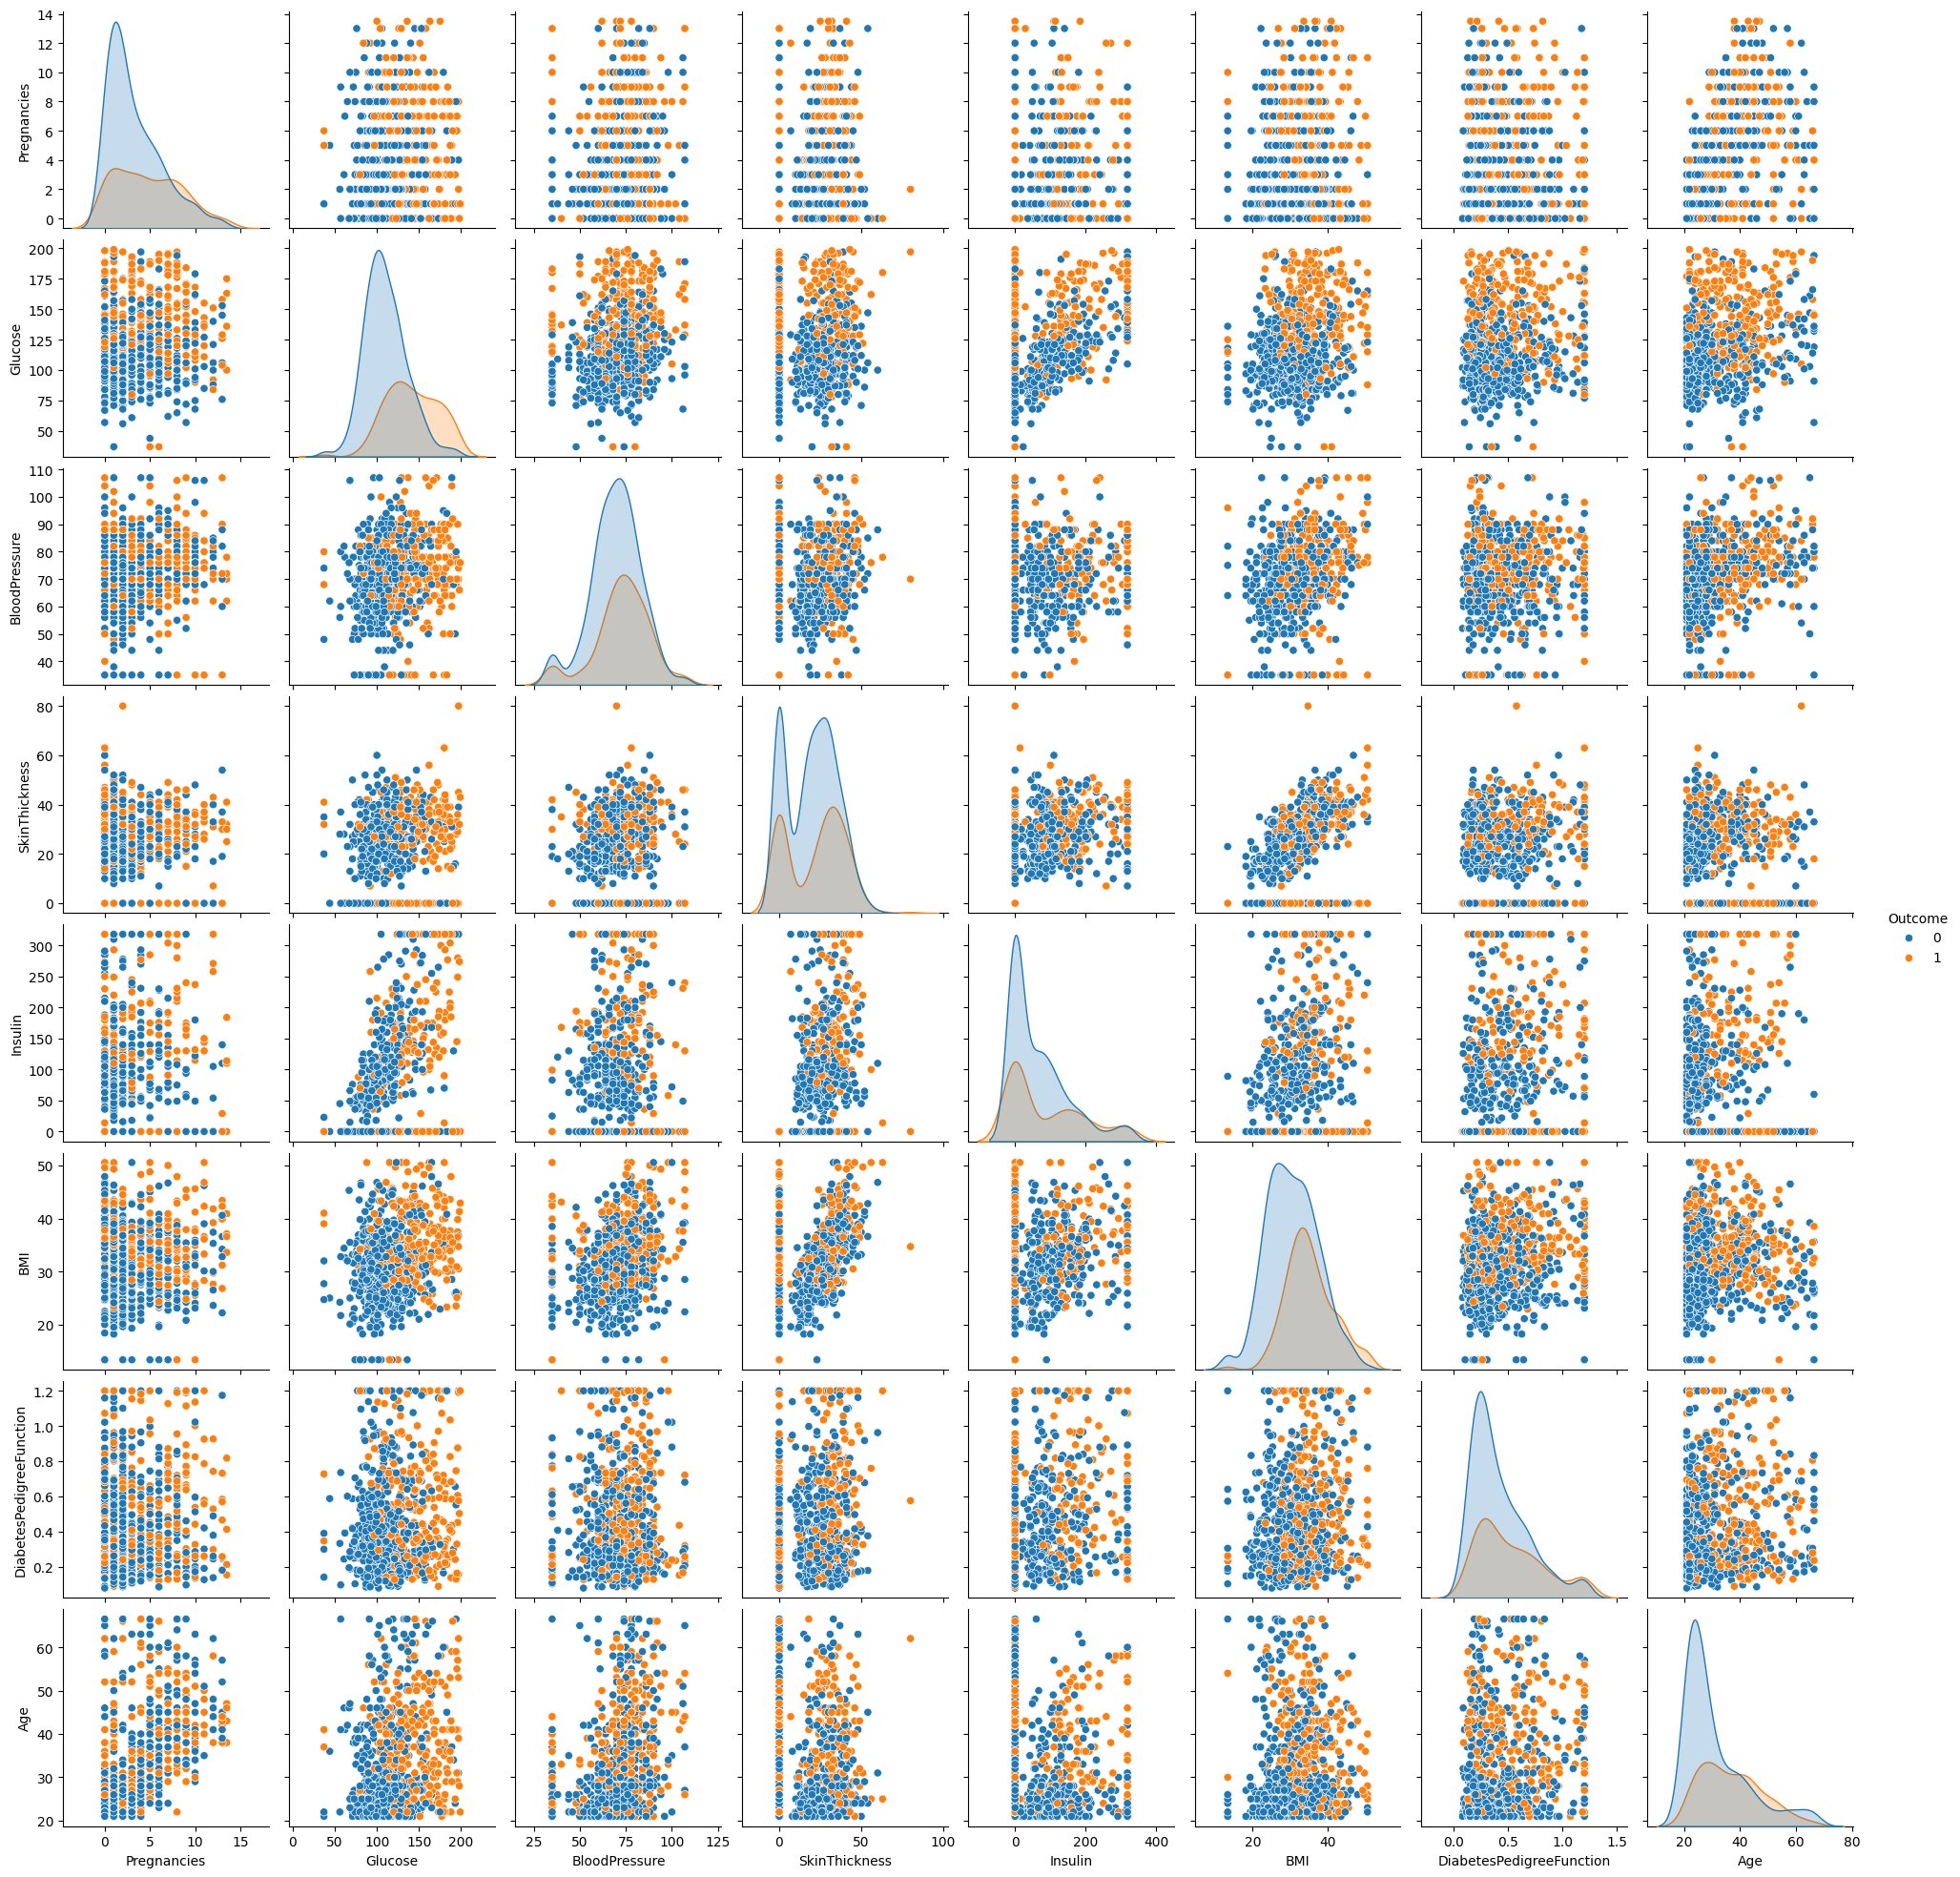

In [13]:
#Scatterplot
sns.pairplot(data=df,hue='Outcome')
plt.show()

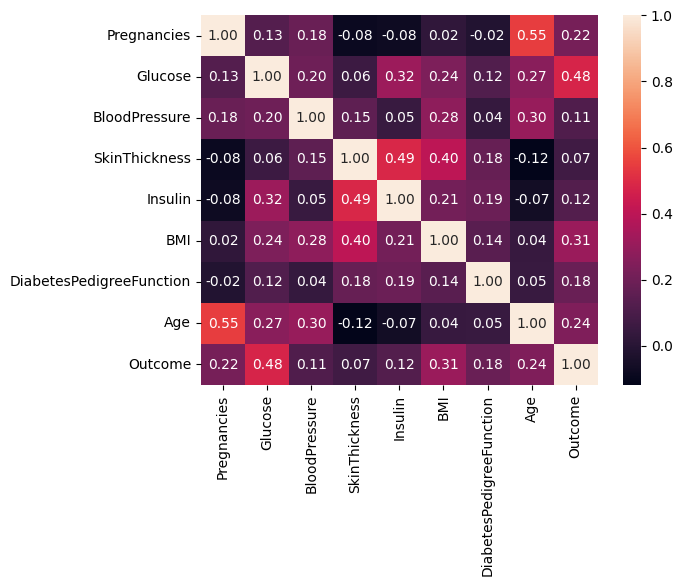

In [15]:
#correlation using heatmap
sns.heatmap(data=df.corr(), fmt=".2f", annot = True)
plt.show()

In [16]:
# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
#Split the data into training and testing data: 75% of data for training and 25% of data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=16)

#SVM Classifier

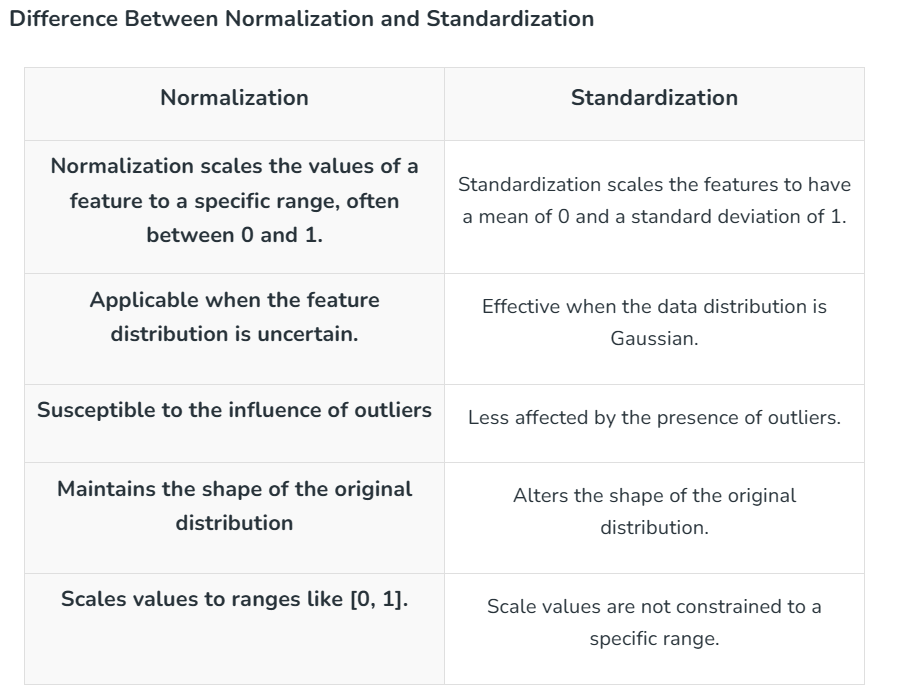     


**When to use Normalization and Standardization?**  
When the **data distribution is unknown or non-Gaussian**, normalization—which is frequently accomplished through MinMax scaling—is especially helpful. It works well in situations when maintaining the distribution’s original shape is essential. Since this method scales values between [0, 1], it can be used in applications where a particular range is required. Normalisation is more susceptible to **outliers**, so it **might not be the best option** when there are extreme values.

However, when the distribution of the data is unknown or **assumed to be Gaussian**, standardization—achieved through Z-score normalization—is preferred. Values can be more freely chosen because standardisation does not limit them to a predetermined range. Additionally, because it is less susceptible to outliers, it can be used with datasets that contain extreme values. Although standardisation modifies the initial distribution shape, it is beneficial in situations where preserving the relationships between data points is crucial.

In [18]:
#Feature scaling: Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_stdscale = scaler.transform(X_train)
X_test_stdscale = scaler.transform(X_test)

#or
#X_train_minmaxscale = scaler.fit_transform(X_train)
#X_test_minmaxscale = scaler.transform(X_test)

In [19]:
X_train[0:5]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
695          7.0    142.0             90             24  318.125  30.4   
119          4.0     99.0             76             15   51.000  23.2   
135          2.0    125.0             60             20  140.000  33.8   
675          6.0    195.0             70              0    0.000  30.9   
326          1.0    122.0             64             32  156.000  35.1   

     DiabetesPedigreeFunction   Age  
695                     0.128  43.0  
119                     0.223  21.0  
135                     0.088  31.0  
675                     0.328  31.0  
326                     0.692  30.0

In [20]:
X_train_stdscale[0:5]

array([[ 0.96901382,  0.66799213,  1.36568992,  0.18383141,  2.57670358,
        -0.26569939, -1.18287455,  0.9033385 ],
       [ 0.06341302, -0.69334405,  0.37478444, -0.38006328, -0.25184121,
        -1.27592951, -0.84181895, -1.05544067],
       [-0.54032085,  0.12978945, -0.75767897, -0.06678845,  0.69056585,
         0.21135372, -1.32647691, -0.1650865 ],
       [ 0.66714689,  2.34591811, -0.04988934, -1.31988776, -0.79187222,
        -0.19554452, -0.46486277, -0.1650865 ],
       [-0.84218778,  0.03481251, -0.47456312,  0.68507113,  0.85998735,
         0.39375638,  0.84191868, -0.25412192]])

In [21]:
X_test_stdscale[0:5]

array([[-0.23845391,  1.33283072, -0.04988934, -0.19209838,  0.31995633,
        -0.0973277 , -0.6802663 , -0.43219275],
       [ 1.27088075, -1.48481857, -0.04988934,  1.18631085, -0.2730189 ,
         0.42181833,  0.88858944,  0.54719683],
       [-0.84218778, -1.51647755, -1.4654686 , -0.6933381 , -0.79187222,
        -1.30399145, -0.75206748, -1.05544067],
       [ 0.36527995,  0.47803824,  0.79945822, -1.31988776, -0.79187222,
        -2.65798043,  0.65523561,  2.99567081],
       [-0.84218778, -0.97827487, -0.61612104, -0.19209838, -0.16713046,
        -1.009341  ,  2.6656686 , -0.69929901]])

model implementation

In [22]:
from sklearn.svm import SVC

#create svm classifier with linear kernel
clf = SVC(kernel = "linear")

#other kernels
#(kernel = "rbf")
#(kernel = "sigmoid")
#(kernel = "poly",degree=4))

clf.fit(X_train_stdscale,y_train)

SVC(kernel='linear')

In [23]:
#predicted value
y_pred_svc= clf.predict(X_test_stdscale)
print(y_pred_svc)

[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1]


In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_svc)

print('confusion matrix')
print(cm)

confusion matrix
[[112  13]
 [ 26  41]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       125
           1       0.76      0.61      0.68        67

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



Text(50.722222222222214, 0.5, 'Actual')

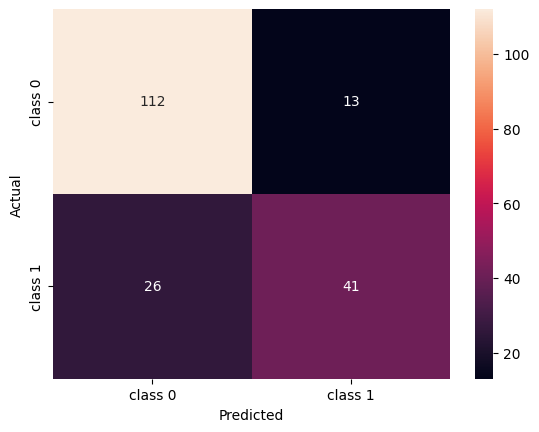

In [25]:
# model performance
from sklearn.metrics import classification_report, confusion_matrix

# importing Seaborn to use heatmap
import seaborn as sns

#
classess_names = ['class 0','class 1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), columns=classess_names, index=classess_names)

sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test,y_pred_svc))

# Set x-axis label
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
# Set y-axis label
plt.ylabel('Actual')

In [26]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
#Accuracy
print("Accuracy: %.2f" % (accuracy_score(y_test,y_pred_svc)*100), "%")

#precision
print("Precision: %.2f" % (precision_score(y_test,y_pred_svc)*100), "%")
#recall
print("Recall: %.2f" % (recall_score(y_test,y_pred_svc)*100), "%")
#f1 score
print("F-measure: %.2f" % (f1_score(y_test,y_pred_svc)*100), "%")

Accuracy: 79.69 %
Precision: 75.93 %
Recall: 61.19 %
F-measure: 67.77 %


#SMOTE
**Synthetic Minority Over-Sampling Technique**  
The Synthetic Minority Over-Sampling Technique (SMOTE) is a powerful method used to handle class imbalance in datasets. SMOTE handles this issue by generating samples of minority classes to make the class distribution balanced. SMOTE works by generating synthetic examples in the feature space of the minority class.

In [27]:
#Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

#check the class distribution before applying SMOTE
print(y_train.value_counts())

smote = SMOTE(sampling_strategy="auto",random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)

#check the class distribution before applying SMOTE
print(y_train_resample.value_counts())

Outcome
0    375
1    201
Name: count, dtype: int64
Outcome
1    375
0    375
Name: count, dtype: int64


In [28]:
#Feature scaling: Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_resample_stdscale = scaler.transform(X_train_resample)
X_test_s_stdscale = scaler.transform(X_test)

#or
#X_train_minmaxscale = scaler.fit_transform(X_train)
#X_test_minmaxscale = scaler.transform(X_test)

In [29]:
from sklearn.svm import SVC

#create svm classifier with linear kernel
clf = SVC(kernel = "linear")

#other kernels
#(kernel = "rbf")
#(kernel = "sigmoid")
#(kernel = "poly",degree=4))

clf.fit(X_train_resample_stdscale,y_train_resample)

SVC(kernel='linear')

In [30]:
#predicted value
y_pred_resample_svc= clf.predict(X_test_s_stdscale)
print(y_pred_resample_svc)

[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 0 0 1 1]


In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_resample_svc)

print('confusion matrix')
print(cm)

confusion matrix
[[102  23]
 [ 17  50]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.68      0.75      0.71        67

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.80      0.79      0.79       192



Text(50.722222222222214, 0.5, 'Actual')

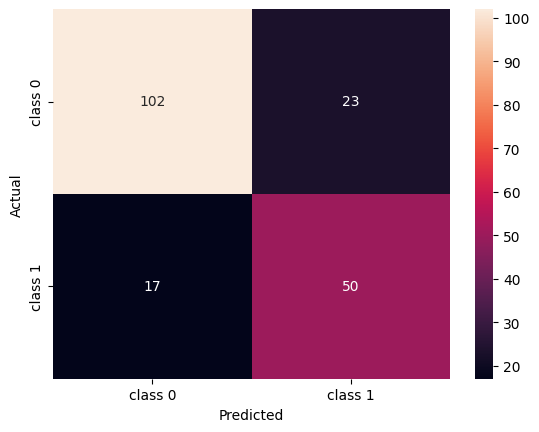

In [32]:
# model performance
from sklearn.metrics import classification_report, confusion_matrix

# importing Seaborn to use heatmap
import seaborn as sns

#
classess_names = ['class 0','class 1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_resample_svc), columns=classess_names, index=classess_names)

sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test,y_pred_resample_svc))

# Set x-axis label
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
# Set y-axis label
plt.ylabel('Actual')

In [33]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
#Accuracy
print("Accuracy: %.2f" % (accuracy_score(y_test,y_pred_svc)*100), "%")

#precision
print("Precision: %.2f" % (precision_score(y_test,y_pred_resample_svc)*100), "%")
#recall
print("Recall: %.2f" % (recall_score(y_test,y_pred_resample_svc)*100), "%")
#f1 score
print("F-measure: %.2f" % (f1_score(y_test,y_pred_resample_svc)*100), "%")

Accuracy: 79.69 %
Precision: 68.49 %
Recall: 74.63 %
F-measure: 71.43 %
